In [1]:
import json
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

In [2]:
CLASSES = [
    "General trash",
    "Paper",
    "Paper pack",
    "Metal",
    "Glass",
    "Plastic",
    "Styrofoam",
    "Plastic bag",
    "Battery",
    "Clothing",
]
TRAIN_JSON = "dataset/train.json"

In [3]:
def set_data() -> pd.DataFrame:
    """데이터 설정
    Return:
        coco format의 train.json의 annotations들을 하나의 행으로 하는 데이터프레임
    """
    coco = COCO(TRAIN_JSON)

    df = pd.DataFrame()

    image_ids = []
    class_name = []
    class_id = []
    bbox_id = []
    x_min = []
    y_min = []
    x_max = []
    y_max = []

    for image_id in coco.getImgIds():

        image_info = coco.loadImgs(image_id)[0]
        ann_ids = coco.getAnnIds(imgIds=image_info["id"])
        anns = coco.loadAnns(ann_ids)

        file_name = image_info["file_name"]

        for ann in anns:
            image_ids.append(file_name)
            class_name.append(CLASSES[ann["category_id"]])
            class_id.append(ann["category_id"])
            bbox_id.append(ann["id"])
            x_min.append(float(ann["bbox"][0]))
            y_min.append(float(ann["bbox"][1]))
            x_max.append(float(ann["bbox"][0]) + float(ann["bbox"][2]))
            y_max.append(float(ann["bbox"][1]) + float(ann["bbox"][3]))

    df["image_id"] = image_ids
    df["class_name"] = class_name
    df["class_id"] = class_id
    df["bbox_id"] = bbox_id
    df["x_min"] = x_min
    df["y_min"] = y_min
    df["x_max"] = x_max
    df["y_max"] = y_max

    return df


In [4]:
df=set_data()
print(df)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
             image_id     class_name  class_id  bbox_id  x_min  y_min  x_max  \
0      train/0000.jpg        Plastic         5        0  197.6  193.7  745.4   
1      train/0001.jpg          Metal         3        1    0.0  407.4   57.6   
2      train/0001.jpg    Plastic bag         7        2    0.0  455.6  144.6   
3      train/0001.jpg          Glass         4        3  722.3  313.4  996.6   
4      train/0001.jpg        Plastic         5        4  353.2  671.0  586.9   
...               ...            ...       ...      ...    ...    ...    ...   
23139  train/4882.jpg        Plastic         5    23139    0.0  116.2  944.1   
23140  train/4882.jpg    Plastic bag         7    23140  302.1  439.3  567.3   
23141  train/4882.jpg  General trash         0    23141  511.3  451.1  570.0   
23142  train/4882.jpg          Paper         1    23142  255.0  421.4  526.7   
23143  train/4882.jpg          Paper 

In [5]:
def class_bbox_size(df):
    '''
    bbox_size: list with [class,bbox_size]
    size_df: pandas dataframe with [class,bbox_size]
    '''
    bbox_size=[]
    for i in range(len(df)):
        row=df.loc[i]
        bbox=(row['x_max']-row['x_min'])*(row['y_max']-row['y_min'])
        bbox_size.append([row['class_name'],bbox])
    
    size_df=pd.DataFrame(bbox_size,columns=['class','size'])
    
    plt.ticklabel_format(style='plain', axis='x')
    sns.histplot(size_df['size'],binwidth=100000).set(title='Overall size')

    fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(15,15))
    axes = axes.flatten()

    for i in range(10):
        axes[i].ticklabel_format(style='plain', axis='x')
        sns.histplot(size_df.loc[size_df['class']==CLASSES[i]]['size'],binwidth=10000,ax=axes[i]).set(title=CLASSES[i])
    plt.tight_layout()



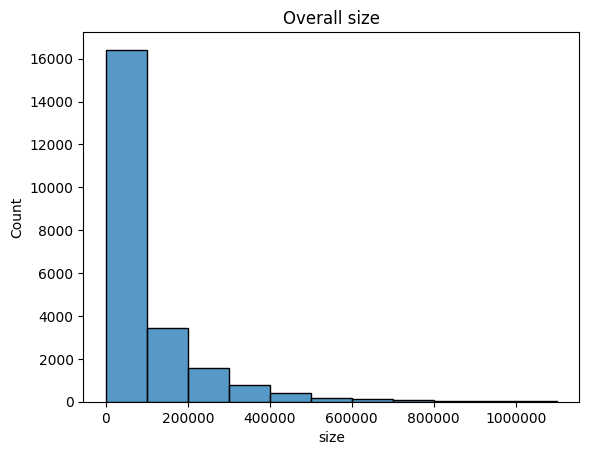

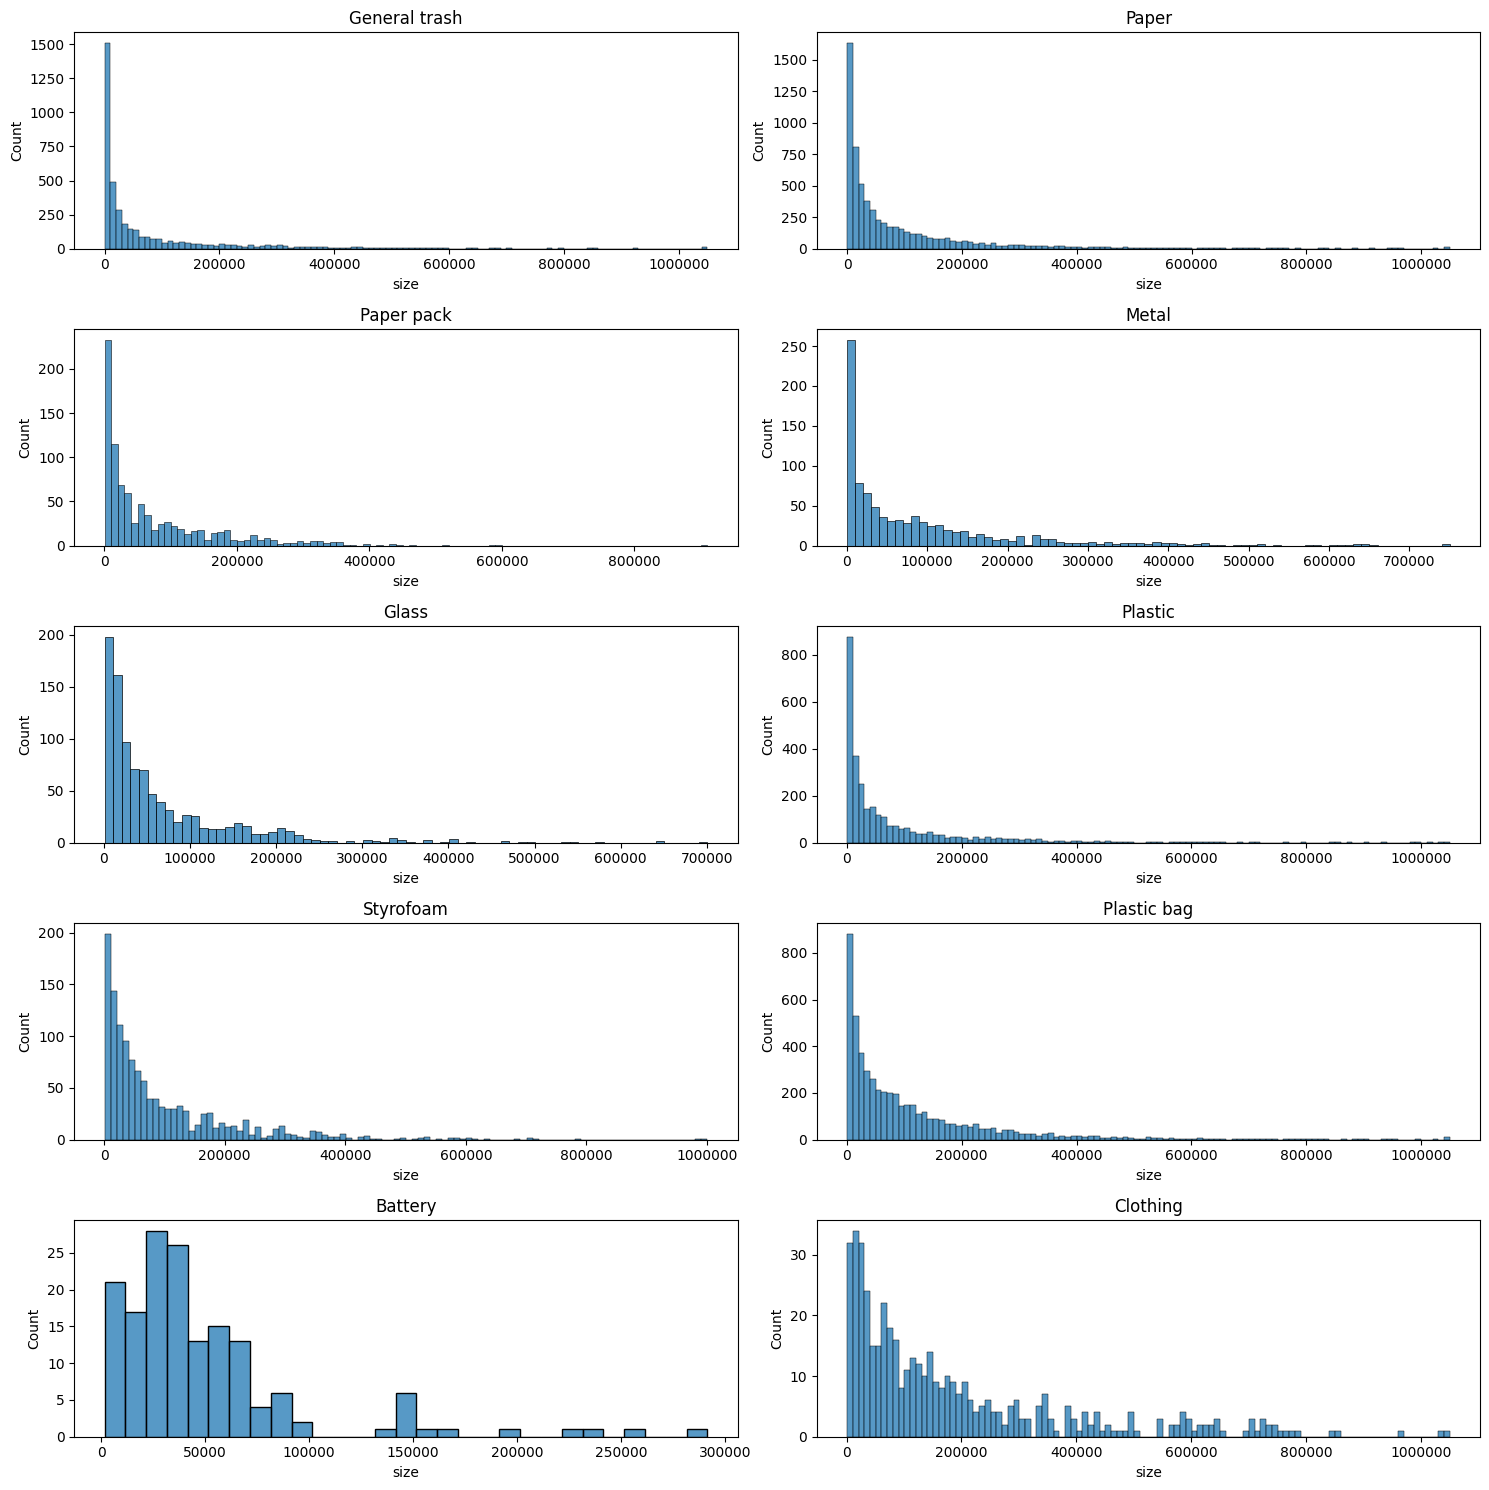

In [6]:
class_bbox_size(df)

In [7]:
def class_bbox_ratio(df):
    '''
    w: width
    h: height
    ratio: length of h when w=1
    bbox_ratio: list with [class,ratio]
    ratio_df: pandas dataframe with [class,ratio]
    '''
    bbox_ratio=[]
    for i in range(len(df)):
        row=df.loc[i]
        w=row['x_max']-row['x_min']
        h=row['y_max']-row['y_min']
        ratio=round(h/w,1)
        bbox_ratio.append([row['class_name'],ratio])

    ratio_df=pd.DataFrame(bbox_ratio,columns=['class','ratio'])

    plt.figure(figsize=(20, 5))
    plt.xticks(rotation=45)
    sns.countplot(x='ratio',data=ratio_df).set(title='Overall ratio (w=1)')

    fig, axes = plt.subplots(nrows=10, ncols=1,figsize=(20,50))
    axes = axes.flatten()

    for i in range(10):
        axes[i].tick_params(axis='x',rotation=45)
        sns.countplot(x='ratio',data=ratio_df.loc[ratio_df['class']==CLASSES[i]],ax=axes[i]).set(title=CLASSES[i])
    plt.tight_layout()

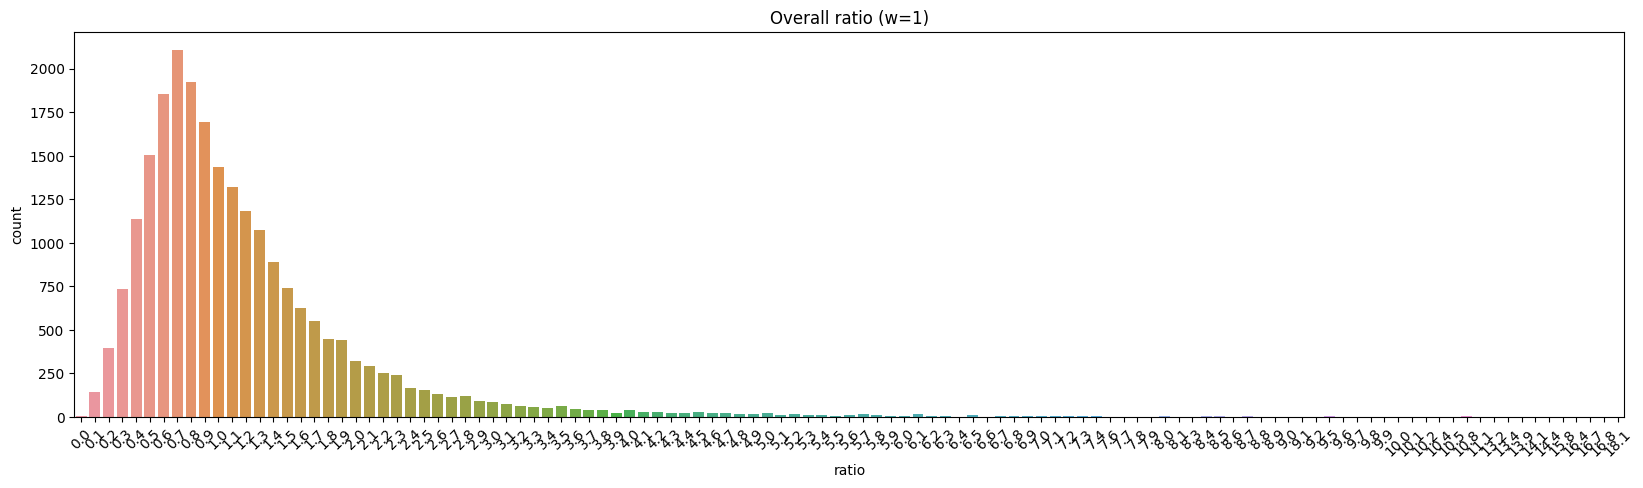

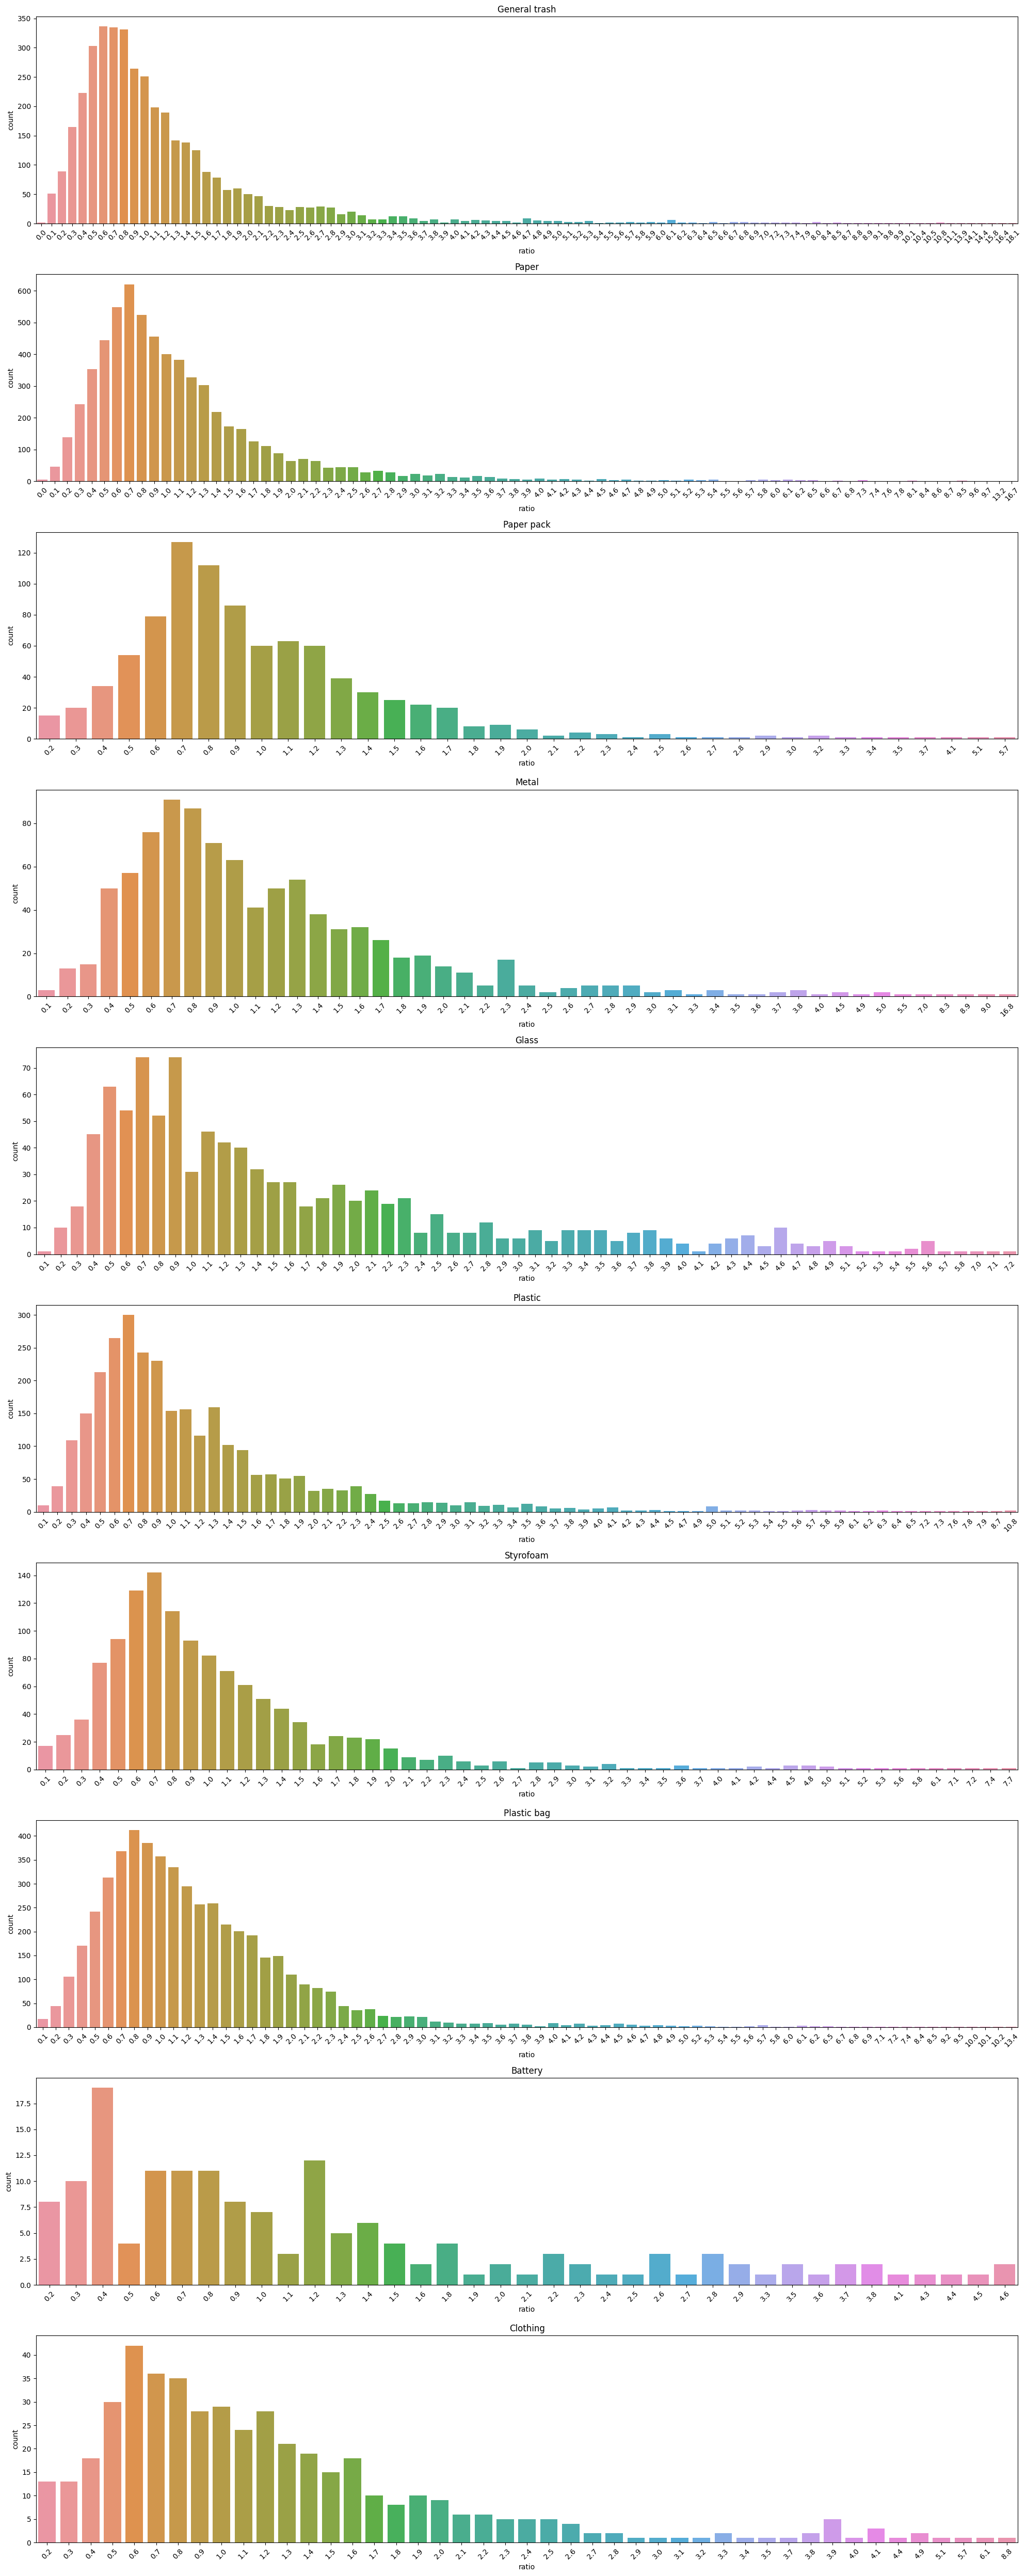

In [8]:
class_bbox_ratio(df)